# Numerical Modelling <img style = "position:absolute; TOP:0px; LEFT:840px; WIDTH:250px; HEIGHT:65px"  src ="https://drive.google.com/uc?export=view&id=1EnB0x-fdqMp6I5iMoEBBEuxB_s7AmE2k" />


In this unit, we're going to learn about the concept of *modeling* data in a way that allows us to make predictions beyond the data set itself.  The main focus of this unit will be *regression* models for numerical data, though we will also use spline interpolation.  We'll first have a look at an example to motivate the goals in this unit. 

In addition to our normal package import, we'll be importing a few other packages as we go.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

## Modelling Cooling

Suppose we made ourselves a cup of tea, and sat down with it and a thermometer.  Right as we sit down, we note that the temperature of the tea is 85 degrees Celsius.  Thirty seconds later, it's 80.3.  We continue measuring and find that the temperature values are 80.3, 75.4, 68.1, 64.6, 56.1, 55.6, and 51 degrees at 1, 2, 2.5, 3.75, 4, and 5 minutes respectively.  We noted that the ambient temperature of the room is 18 degrees.  Putting this all into a dataframe:

In [2]:
t = pd.DataFrame({'Temp':[85.0, 80.3, 75.4, 68.0, 64.6, 56.1, 55.6, 51.0], 
                  'Time': [0,0.5,1,2,2.5,3.75,4,5]})
t

Temp  Time
0  85.0  0.00
1  80.3  0.50
2  75.4  1.00
3  68.0  2.00
4  64.6  2.50
5  56.1  3.75
6  55.6  4.00
7  51.0  5.00

If we were to plot this data, it would look like this:

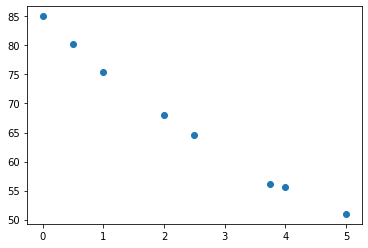

In [3]:
plt.scatter(t["Time"], t["Temp"])

Now, what if we wanted to know what the temperature of the tea was going to be 10 minutes from when we started, without measuring it?  Or what if we wanted to know what the temperature was at 1.5 minutes from when we started, between two data points?  Our best bet would be to take the data we have, and fit a *mathematical model* to it, i.e., create a function which takes time as an input and outputs a temperature, and which closely fits the data we have.  This way, we could input any time we wanted and have the model tell us what the temperature will be (within some level of error).  And, if our function is "nice" enough, we could potentially take a given temperature and solve for what time that temperature occurs.

In essence, we'll have a way of representing the underlying phenomena we were measuring with our data, and will be able to gain insight beyond the scope of the individual data points we collected.

Choosing a modelling technique depends on a number of things, including the type and shape of the data, complexity of the model, etc.  We'll be looking at a number of common modeling techniques shortly. Luckily for us, there is already a model that describes the cooling of objects (and is likely familiar to anyone who has taken first-year calculus).  **Newton's Law of Cooling** states that the temperature $T$ at any time $t$ for an object of initial temperature $T_0$ sitting in an room of ambient temperature $\tau$ is given by:

$$ T(t) = \tau + (T_0-\tau)e^{-kt}. $$

Here $k$ is a constant that depends on the particular objects involved, and has units of $time^{-1}$.  To solve for $k$, we would need two data points:  $T_0$, and the temperature $T_i$ at some other time $t_i$.  For our particular example, the value of $k\cong -\frac{1}{2}\log(\frac{50}{67})$, and so the equation becomes:

$$ T(t) = 18 + (85 - 18)e^{\frac{t}{2}\log(\frac{50}{67})} = 18 + 67\sqrt{\left(\frac{50}{67}\right)^t} $$

We can define a Python function for the model:

In [4]:
def cooling1(t):
    return 18+67*((50/67)**(t/2))

We've represented the change in temperatures as a fairly simple function, which allows us to *given some initial conditions* input whatever time we'd like to determine the temperature.  If we plot the function (with our particular value of $k$) against the data above, we have:

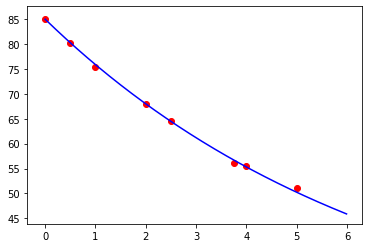

In [5]:
x = np.arange(0,6,0.01)
plt.plot(x, cooling1(x),color='blue');
plt.scatter(t["Time"],t['Temp'],color='red');

As we can see, the model fits the data very well!  (There are various methods for *validating* a model on a data set, which we will see in a later unit.)

If we wanted to find out what the temperature was at 1.5 minutes (between two of our observations), we could compute:

In [6]:
cooling1(1.5)

71.795531651779

If we wanted to make the model a little more in line with the measurements we took, we could round to one decimal place:

In [7]:
round(cooling1(1.5),1)

71.8

And if we wanted to know what the temperature would be 10 minutes after we sat down:

In [8]:
round(cooling1(10),1)

33.5

What would the temperature be after an hour?

In [9]:
round(cooling1(60),1)

18.0

So by that point, the tea has cooled to the point where it is room temperature.

## Linear Regression

One of the simplest, and also most commonly used methods for modelling a data set is *linear regression*.  This method presumes that the relationship of the dependent variables of your data set to the independent variables is linear.  In the two-dimensional case, where the dependent variable $y$ and the independent variable $x$ are scalars, a linear relation between the two would have the form:

$$y = \beta_0 +\beta_1x + \epsilon.$$
            
Here, the $\beta_i$ are unknown coefficients that we must solve for, often called *regression coefficients*.  The $\epsilon$ is an error term that attempts to account for other factors that influence the value of $y$ beyond the independent variables $x$ (often called the *regressors*).  Here is a visual example of a two-dimensional linear regression model:



 <img src="https://drive.google.com/uc?export=view&id=1WWMo_2P_fwRD1DM02y9hZkA2BRcIpSls" width="500" height ="500" style ="float:left"/>

A **multiple (or _multivariate_) linear regression** model is essentially the same, but it relates a dependent variable $y$ to a bunch of independent variables:

$$y = \beta_0 + \beta_1 x_1 + \dots + \beta_k x_k + \epsilon$$

### Finding the line of best fit

We'll think about solving the regression problem in terms of "finding the line of best fit". In order to do this, we need a rigorous definition of what it means to fit well. We'll do this by defining a **cost function**. The idea of a cost function is fundamental in machine learning.

A cost function is a function that takes in the regression model and outputs a number indicating the quality of the fit. Lower costs are better than higher costs.

The cost function that we use for the linear regression model is commonly used for many types of models:

$$C = \sum_{i=1}^N (\hat{y_i} - y_i)^2$$

Here, $\hat{y_i}$ refers to the _predicted_ values. If $\tilde{\beta}_0$ and $\tilde{\beta}_1$ are some guesstimates for the true values of the coefficients, then for an observed value $x_i$, we would have $\hat{y} = \tilde{\beta}_0 + \tilde{\beta}x_i$. Then the error is given by $\hat{y_i} - y_i$, and the cost function is given by the **sum of squared errors**.

We can use the cost function to evaluate different fits. Let's explore this with some synthetic data.

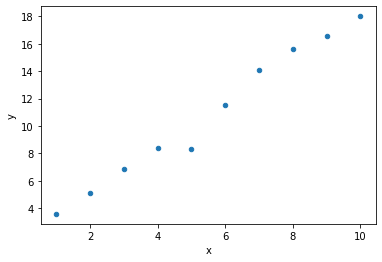

In [10]:
df = pd.DataFrame(dict(x=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10], y=[3.6,5.1,6.9,8.4,8.3,11.5,14.1,15.6,16.6,18]))
df.plot.scatter(x='x', y='y')

Consider two linear models for this data. The first is given by

$y = 1 + 4x$

and the second is given by 

$y = 2 + 3x$

Create two new columns `yhat_1` and `yhat_2` of predicted values from this model. Then compute the sum of squared errors for each model. Which model fits better? Can you find an even better model? 

In [11]:
# Calculated the predicted y values for the 2 models above
yhat_1 = 1 + 4 * df['x']
yhat_2 = 2 + 3 * df['x']

# Predicted y values for new model that outperforms model 1 and 2
yhat_3 = 1 + 1.8 * df['x']

# Add the predictions from each model to the data frame
df['yhat_1'] = yhat_1
df['yhat_2'] = yhat_2
df['yhat_3'] = yhat_3

# Calculate the "cost" for each model (sum of squared errors)
model_1_loss = ((df['yhat_1'] - df['y']) ** 2).sum()
model_2_loss = ((df['yhat_2'] - df['y']) ** 2).sum()
model_3_loss = ((df['yhat_3'] - df['y']) ** 2).sum()

print('Model 1 (y=1+4x) loss: ' + str(model_1_loss))
print('Model 2 (y=2+3x) loss: ' + str(model_2_loss))
print('Model 3 (y=1+1.8x) loss: ' + str(model_3_loss))

Model 1 (y=1+4x) loss: 1941.81
Model 2 (y=3+3x) loss: 907.41
Model 3 (y=1+1.8x) loss: 5.809999999999996


The best model is the one that makes the cost function as small as possible. This turns out to exist for any dataset as long as the columns of the dataset are linearly independent, i.e., essentially, as long as no pair of columns is perfectly correlated.

There's even a neat formula for the coefficients that give the solution to the linear regression problem. In the two variable case, the solution is given by:

$$\beta_1 = \frac{\text{Cov}(x,y)}{\text{Var}(x)}$$
$$\beta_0 = \bar{y} - \beta_1 \bar{x}$$

We'll use these formulas to find the linear regression coefficients, and compute the sum of squares below.

In [12]:
beta_1 = np.cov(df['y'], df['x'])[0,1] / np.cov(df['y'], df['x'])[1,1]
beta_0 = np.mean(df['y']) - beta_1 * np.mean(df['x'])
print("beta_0 = " + str(beta_0))
print("beta_1 = " + str(beta_1))

# Add the new yhat to the dataframe
df['yhat'] = beta_0 + beta_1 * df['x']

# Compute the sum of squares
print("Sum of squared errors = " + str(sum((df['y'] - df['yhat'])**2)))

## Much lower than the other regressions!

beta_0 = 1.6799999999999962
beta_1 = 1.6600000000000004
Sum of squared errors = 4.111999999999999


### Choosing Linear Regression

Before we look at different implementations of linear regression, one question we should ask is "when should we choose linear regression as our model?".  The short answer is "when there is a strong linear relation in our data", and there are two methods that can help us determine this.  The first is visual inspection.  As an example, let's look at two data sets:

In [13]:
# Independent Axis
x = [x for x in range(-10,10)]

# Dependent Axes
y1 = [a + round(np.random.normal(0,0.75),2) for a in x]
y2 = [a**2 + round(np.random.normal(0,3),2) for a in x]

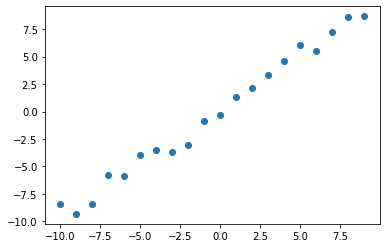

In [14]:
plt.scatter(x,y1)

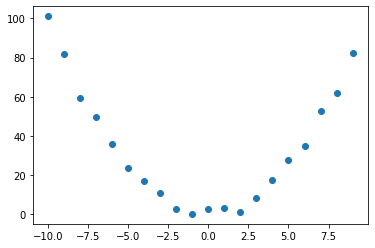

In [15]:
plt.scatter(x,y2)

Ignoring how we made the data sets, the first plot certainly seems to be linear, but the second plot has a distinct curvature that would lead us to believe that the data is not linearly related.

The second method we have is the Pearson correlation coefficient, which we learned was a measure of how strongly two data sets are *linearly related*.  The closer to 1 or -1 the correlation is, the stronger the linear relationship in the data is.  We compute the correlation for each of these sets:

In [16]:
np.corrcoef(x,y1)

array([[1.        , 0.99329979],
       [0.99329979, 1.        ]])

In [17]:
np.corrcoef(x,y2)

array([[ 1.        , -0.18032398],
       [-0.18032398,  1.        ]])

The correlation for the first data set is very close to 1, reinforcing our conclusion from our visual inspection that the data is strongly linearly related.  The correlation for the second data set is much closer to 0, meaning that there is no strong linear relation in the data.

## Linear Regression with `statsmodels`

The `statsmodels` package gives a very convenient interface for performing linear regression, as well as nice methods for printing the results in a human-readable format. `statsmodels` also allows you to specify a regression using a **formula** written in a mini-language called [Patsy](https://patsy.readthedocs.io/en/latest/overview.html), which is modelled after R's _formula_ object.

A formula specifies which column of a dataframe is the dependent variable, and which are the independent variables. To perform our linear regression from above, we would use the following code.

In [18]:
# Import the formula tools
import statsmodels.formula.api as smf

# Create the linear regression model object ("ols" stands for ordinary least squares)
model = smf.ols(data = df, formula = "y ~ x")

# Create a RegressionResults object
result = model.fit()

A little bit of explanation is in order. The line starting with `model = ` is essentially setting things up. It lets `statsmodels` know where our data is, and which columns of the data should be used for what in the model. The general form of a formula for a simple linear regression is `"dependent_var ~ indep_1 + indep_2 + ... + indep_k"`. As long as all of the variable names listed are column names of the data frame, this will work.

Once we have set everything up, the `.fit()` method actually performs the Ordinary Least Squares optimization process, and returns an object containing the result. The result object has a very handy `summary` method that shows us what's going on.

In [19]:
result.summary()

/Users/williecostello/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     442.3
Date:                Wed, 12 Aug 2020   Prob (F-statistic):           2.74e-08
Time:                        11:09:51   Log-Likelihood:                -9.7460
No. Observations:                  10   AIC:                             23.49
Df Residuals:                       8   BIC:                             24.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6800      0.490      3.430      0.009       0.551       2.809
x              1.6600      0.079     21.031      0.000       1.478       1.842
==============================================================================
Omnibus:                       12.020   Durbin-Watson:                   1.691
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                5.528
Skew:                          -1.502   Prob(JB):                       0.0630
Kurtosis:                       5.061   Cond. No.                         13.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Important parts of this table:
- **R-squared:** This is a measure of the goodness of fit, ranging from 0 to 1. The closer this is to 1, the better the fit of your model.
- **coef:** These are the values of the estimated coefficients.
- **P>|t|:** This is a p-value for the null hypothesis that the associated coefficient is zero. In this instance, both coefficients have p-values below our usual cutoffs, so we would reject that null hypothesis and conclude that the coefficients are not zero.
- **[0.025 0.975]:** This is a 95% confidence interval for the value of the coefficient. Note that this is closely related to the p-value; 0 will be in the confidence interval if and only if p >= .05.

It is useful to learn about the other parts of this table as well, but those should be the first things that we look at when we summarise a regression.

Let's try a more complicated example.

In [20]:
diamonds = pd.read_csv("data/diamonds.csv")
diamond_reg = smf.ols("price ~ carat + depth + table", data=diamonds).fit()  # Here we create and fit our model on the same line
diamond_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                 1.980e+04
Date:                Wed, 12 Aug 2020   Prob (F-statistic):               0.00
Time:                        11:12:30   Log-Likelihood:                -87459.
No. Observations:               10000   AIC:                         1.749e+05
Df Residuals:                    9996   BIC:                         1.750e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.175e+04    883.671     13.298      0.000       1e+04    1.35e+04
carat       7921.3004     32.785    241.614      0.000    7857.035    7985.565
depth       -135.9764     10.829    -12.557      0.000    -157.203    -114.749
table        -99.7469      7.231    -13.795      0.000    -113.921     -85.573
==============================================================================
Omnibus:                     2573.070   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24671.823
Skew:                           0.958   Prob(JB):                         0.00
Kurtosis:                      10.453   Cond. No.                     4.90e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

What does this tell us about how the price of a diamond is related to these variables?

One of the most important methods that the RegressionResult object provides is that it lets us predict new values given new or hypothetical data.

In [21]:
new_diamonds = pd.DataFrame({'carat': [0.5, 1, 1.5, 2, 2.5, 3],
                             'depth': [50, 50, 50, 50, 50, 50], 
                             'table': [40, 40, 40, 40, 40, 40]})
new_diamonds['predicted'] = diamond_reg.predict(new_diamonds)
new_diamonds

carat  depth  table     predicted
0    0.5     50     40   4923.370368
1    1.0     50     40   8884.020544
2    1.5     50     40  12844.670720
3    2.0     50     40  16805.320896
4    2.5     50     40  20765.971072
5    3.0     50     40  24726.621249

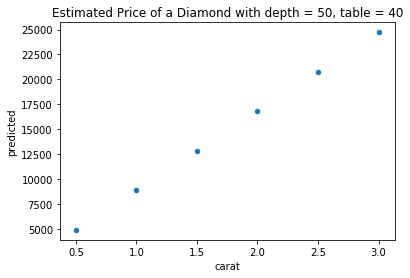

In [22]:
new_diamonds.plot.scatter(x='carat', y='predicted', title='Estimated Price of a Diamond with depth = 50, table = 40')

### Linear Regression with Categorical Predictors

So far we have looked at how to perform a linear regression using continuous variables as predictors. Is it possible to perform linear regression using categorical variables as predictors too? As an example, not only do we expect the numeric variables in the diamonds dataset to have an impact on price, but we expect the categorical variables such as cut and color to have an impact as well.

The mathematics of linear regression only allows for numeric variables to be included in the model, but there is a way to get around that: we can use **dummy variables**. Dummy variables, which are sometimes called **indicator variables**, and sometimes **one-hot encoders**, are variables that we generate that only take on the value of 0 or 1. We can use dummy variables to encode categorical data in a numeric form.

**Create a dataset below called diamonds_2 which has a dummy variable called "ideal" equal to 1 whenever the cut is _Ideal_. (Remember to use `.copy()`)**

In [25]:
diamonds_2 = 

With the state of being ideal cut encoded using a dummy variable, we can include the dummy variable in the linear regression formula to obtain an estimate of the price impact of a diamond having an ideal cut.

In [27]:
diamond_reg_ideal = smf.ols("price ~ carat + depth + table + ideal", data=diamonds_2).fit() 
diamond_reg_ideal.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.857
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                 1.497e+04
Date:                Wed, 12 Aug 2020   Prob (F-statistic):               0.00
Time:                        11:18:59   Log-Likelihood:                -87422.
No. Observations:               10000   AIC:                         1.749e+05
Df Residuals:                    9995   BIC:                         1.749e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7904.4412    988.201      7.999      0.000    5967.369    9841.513
carat       7936.0159     32.712    242.605      0.000    7871.894    8000.137
depth       -115.1817     11.059    -10.415      0.000    -136.860     -93.504
table        -57.5904      8.722     -6.603      0.000     -74.688     -40.493
ideal        324.9853     37.902      8.574      0.000     250.691     399.280
==============================================================================
Omnibus:                     2607.328   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            25416.815
Skew:                           0.969   Prob(JB):                         0.00
Kurtosis:                      10.566   Cond. No.                     5.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**What do these results tell us about ideal cut diamonds?**

Thankfully, this is a common enough procedure that statsmodels has ways of doing it automatically, so that we don't have to create dummy variables every time. If we include a categorical variable in a formula, statsmodels will automatically create dummy variables for the levels of the categorical variable.

In [28]:
diamond_reg_cut = smf.ols("price ~ carat + depth + table + cut", data=diamonds).fit() 
diamond_reg_cut.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     8727.
Date:                Wed, 12 Aug 2020   Prob (F-statistic):               0.00
Time:                        11:19:35   Log-Likelihood:                -87336.
No. Observations:               10000   AIC:                         1.747e+05
Df Residuals:                    9992   BIC:                         1.747e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         2146.2855   1076.080      1.995      0.046      36.953    4255.618
cut[T.Good]        948.5817    100.292      9.458      0.000     751.990    1145.173
cut[T.Ideal]      1482.7610     98.697     15.023      0.000    1289.294    1676.227
cut[T.Premium]    1150.9392     94.735     12.149      0.000     965.240    1336.638
cut[T.Very Good]  1221.8931     94.867     12.880      0.000    1035.935    1407.852
carat             7953.9432     32.539    244.445      0.000    7890.161    8017.726
depth              -64.7706     11.739     -5.517      0.000     -87.782     -41.759
table              -31.1886      8.902     -3.503      0.000     -48.639     -13.738
==============================================================================
Omnibus:                     2679.548   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24999.631
Skew:                           1.017   Prob(JB):                         0.00
Kurtosis:                      10.474   Cond. No.                     6.06e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Interpreting regression coefficients

Let's have a close look at this table. It models diamond price as

$$\text{price} = 2146.29 + 7953.94\times\text{carat} - 64.78\times\text{depth} - 31.19\times\text{table} + 948.59\times\mathbb{1}_{\text{cut=Good}} + 1221.89\times\mathbb{1}_{\text{cut=Very Good}} + 1150.94\times\mathbb{1}_{\text{cut=Premium}} + 1482.76\times\mathbb{1}_{\text{cut=Ideal}} + \epsilon$$

The coefficients in a linear equation give the expected change of the response variable given a one unit increase in each of the independent variables. So this says that a one unit increase in carat is expected to increase the price of a diamond by \$7953.94, while a one unit increase in depth _decreases_ the price of a diamond by an average of \$64.78. Units are important here: the changes are in dollars because the response variable was in dollars.

Some attention needs to be paid to the interpretation of the categorical variables. Note that there's a missing category.

In [29]:
diamonds['cut'].unique()

array(['Premium', 'Good', 'Ideal', 'Very Good', 'Fair'], dtype=object)

The level "Fair" was left out. This is due to the slightly technical issue of _multicollinearity_. If all five categories were converted to dummy variables, then the sum of the five dummy variables would _always_ be 1. If some combination of variables adds up to a constant, then there is no solution to the linear regression problem (this is only true when our regression formula includes a constant term, but for our purposes it always will). So `statsmodels` chooses a class to serve as a _reference class_: in this case, it chose `Fair`. When a diamond is of cut `Fair`, all of the dummy variables are equal to 0, and so the price of the diamond is determined by the carat, depth and table. The coefficients on each of the dummy variables give the _difference in price_ between the reference class and the dummy variable's class. So the coefficient 1,482.76 on the _ideal_ dummy variable says that given two diamonds with identical weight, depth, and table, but one is of fair cut and the other is of ideal cut, the ideal cut diamond will be \$1.482.76 more expensive on average. 

#### Problems

Without using `diamond_reg.predict()`, 

1. Find the estimated price of a premium cut 1.8 carat diamond with table equal to 55 depth equal to 62
2. Find the estimated price of a fair cut 2 carat diamond with table equal to 55 and depth equal to 62

### Nonlinear transformations

Linear regression is inherently _linear_ – ergo the name – but it is possible to introduce nonlinearities into a linear regression model by transforming the features or the response variable.

There are a few nonlinear transformations that tend to be useful for regression modelling.

#### Logarithms

Logarithms are an important non-linear transformation in linear regression. Recall that for a number $x$, the natural logarithm $z=\ln(x)$ is the number $z$ such that $x=e^z$ where $e=2.71828...$ is Euler's constant. This number and the associated transformations are important in mathematical analysis, and so `numpy`'s `np.exp` and `np.log` functions use the natural exponential and logarithm by default.

In [30]:
np.exp(1)

2.718281828459045

A common type of transformation is to take the natural logarithm of either the response variable, some or all of the dependent variables, or both. To see why this is a useful transformation, we'll need to do some math. Consider the linear equation $$\ln (y) = \beta_0 + \beta_1\ln(x)$$

It is common to refer to this as a _log-log model_, since we are taking the logarithm of both the dependent and independent variables.

Taking the exponential of both sides of the equation, we get 
$$\begin{align}y &= e^{\beta_0 + \beta_1\ln(x)} \\
&=e^{\beta_0} x^{\beta_1} \end{align}$$

The upshot here is that **the log-log model represents _multiplicative_ rather than linear relationships between the independent and dependent variable**. 

Let's see if this type of model would be a better fit for the diamonds data. 

In [31]:
logmodel = smf.ols("np.log(price) ~ np.log(carat)", diamonds).fit()
logmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          np.log(price)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                 1.360e+05
Date:                Wed, 12 Aug 2020   Prob (F-statistic):               0.00
Time:                        11:24:18   Log-Likelihood:                -959.99
No. Observations:               10000   AIC:                             1924.
Df Residuals:                    9998   BIC:                             1938.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.4515      0.003   2630.086      0.000       8.445       8.458
np.log(carat)     1.6848      0.005    368.776      0.000       1.676       1.694
==============================================================================
Omnibus:                      152.888   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.890
Skew:                           0.081   Prob(JB):                     2.75e-61
Kurtosis:                       3.802   Cond. No.                         2.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
pd.DataFrame({'carat': np.arange(0, 4, .02)})

carat
0     0.00
1     0.02
2     0.04
3     0.06
4     0.08
5     0.10
6     0.12
7     0.14
8     0.16
9     0.18
10    0.20
11    0.22
12    0.24
13    0.26
14    0.28
15    0.30
16    0.32
17    0.34
18    0.36
19    0.38
20    0.40
21    0.42
22    0.44
23    0.46
24    0.48
25    0.50
26    0.52
27    0.54
28    0.56
29    0.58
..     ...
170   3.40
171   3.42
172   3.44
173   3.46
174   3.48
175   3.50
176   3.52
177   3.54
178   3.56
179   3.58
180   3.60
181   3.62
182   3.64
183   3.66
184   3.68
185   3.70
186   3.72
187   3.74
188   3.76
189   3.78
190   3.80
191   3.82
192   3.84
193   3.86
194   3.88
195   3.90
196   3.92
197   3.94
198   3.96
199   3.98

[200 rows x 1 columns]

/Users/williecostello/opt/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


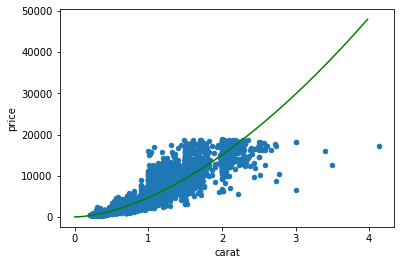

In [32]:
diamonds.plot.scatter(x='carat', y='price')
plt.plot(np.arange(0, 4, .02), np.exp(logmodel.predict(pd.DataFrame({'carat': np.arange(0, 4, .02)}))), color = 'green')

# Assignment 7

1. Take the data we had for the tea cooling, and fit a linear regression model to it.  Use the `cooling1(t)` function to expand the data set to include the value for `t=6`.  Make a linear regression model for this new data set.  By adding a single data point, by how much did the slope of the regression model increase or decrease (as a percentage of the original slope)?

2. Using the marketing data `MLR.csv` from the multiple linear regression section, create individual single linear regression models for budget vs sales and visits vs sales.  By what percentage were each of these models off from the value we got for `marketing_model(1.6, 2.1)`?

3. Use the `customer_info.csv` for these questions.

 1. The big Telecom that you work for is interested in the relationship between the number of employees who work at a company and how much they spend on different products. Perform two linear regressions, each with EMP as the independent variable, but with MOBILITY as the dependent variable in one and INTERNET as the dependent variable in the other. Describe in words the relationship between each of these revenue categories and the number of employees at a company. Do these results make sense to you? Why or why not?

 2. We are now interested in how the relationship between Mobility revenue and employees changes across different industries. Pick two industries to investigate, and create two data frames, each with data on one of your chosen industries. Run a regression on each data frame to see how the relationship between the number of employees changes between industries. Describe your findings in words. (Note: it would be good if we could organize ourselves so that at least one person is doing each possible pair of industries.)

 3. Repeat the same exercise with Internet revenue instead of Mobility.
 
 4. (Optional) To see how effects differ across categorical variables using a regression, it is useful to use an interaction term. Use an interaction term to investigate the effect of employees on mobility across all industries.
 
 5.  Use your findings to make a recommendation to the marketing team about how they could use information about how many employees work at companies to create campaigns with the highest return.

4. (Bonus) Using the cooling model we made for the cup of tea, find the precise time (minutes, to within 2 decimal places) that the tea reaches room temperature. 

<div id="container" style="position:relative;">
<div style="position:relative; float:right"><img style="height:25px""width: 50px" src ="https://drive.google.com/uc?export=view&id=14VoXUJftgptWtdNhtNYVm6cjVmEWpki1" />
</div>
</div>